# Самостоятельная работа
Начнём немного издалека. Представьте, что вы общаетесь с незнакомым человеком по телефону или сидя к нему спиной. Сможете ли вы по нескольким фразам понять, какого пола ваш собеседник? В большинстве случаев это будет лёгкой задачей. Но задумывались ли вы, как ваш мозг определяет пол человека по голосу?

**Всё очень просто:** *женские и мужские голоса заметно различаются по акустическим свойствам*. Есть существенные физиологические различия, подтверждённые научно и активно используемые как в общественной жизни, так и технических устройствах. Они обусловлены небольшими различиями в строении речевого аппарата мужчины и женщины, которые формируются с возрастом. Эти различия проявляются в частотах звука, тембре и громкости.

Поэтому когда вы слышите незнакомый голос, ваш мозг на основе его акустических свойств и уже заранее заготовленных паттернов в вашей памяти определяет пол человека.

Почему бы нам не обучить модель машинного обучения классифицировать людей на мужчин и женщин по их голосу? Системе идентификации пола по голосу, основанной на такой модели, можно найти применение во многих областях — от маркетинга до интегрирования в системы безопасности.

На Kaggle можно найти множество датасетов для решения этой задачи. Большинство из них состоят из больших массивов размеченных аудиофайлов, обработку которых составители датасетов возлагают на исследователей.

Мы пока что не умеем работать с аудиоинформацией и преобразовывать её в привычный нам формат табличных данных, поэтому для решения данной задачи мы нашли готовый датасет, в котором все преобразования аудиоинформации в числовой табличный формат уже произведены.

* Набор данных состоит из 3 168 записанных образцов голоса мужчин и женщин. 
* Образцы предварительно обрабатываются с помощью акустического анализа на языке программирования R с использованием специальных библиотек в диапазоне частот 0 Гц-280 Гц (диапазон человеческого голоса). 

Если вкратце, в результате обработки звук на аудиозаписи оцифровывается и преобразуется в числовую последовательность частот, из которой извлекаются различные статистические характеристики, например средняя частота, с которой говорит спикер на аудиозаписи, или частота с наибольшей энергией и так далее.

В столбцах таблицы содержатся статические характеристики для каждой из аудиозаписей, вычисленные на основе акустических свойств.

Здесь стоит сделать важное лирическое отступление.

*Очень часто Data Scientist сталкивается с задачами, которые находятся за гранью области его компетенций. Типичный пример — медицинские задачи. Дата-сайентист может не разбираться в том, как получаются те или иные медицинские показатели, в чём они измеряются и какая у них норма, ведь это зона компетенций врача. Однако это же не повод не решать поставленную задачу (хотя, конечно же, базовое понимание внутренней кухни в большинстве случаев даёт определённый бонус).* 

**Мы сейчас как раз рассматриваем пример подобного рода — нам интересен не столько процесс извлечения данных из каждой аудиозаписи, сколько сам результат.**

Наша цель как специалистов в Data Science состоит в построении модели распознавания пола по уже обработанным аудиозаписям, а не в проектировании процесса их обработки. То есть в процессе решения задачи вы вполне можете абстрагироваться от непосредственного значения самих признаков и воспринимать их в математическом ключе как векторы $x_1, \ x_2, \ ..., \ x_M$.

**Для любознательных студентов мы привели список столбцов и их краткое описание.**

* meanfreq — средняя частота голоса спикера (в кГц);
* sd — стандартное отклонение частоты (в кГц);
* median — медианная частота (в кГц);
* Q25 — первый квартиль частоты (25-я квантиль) (в кГц);
* Q75 — третий квартиль частоты (75-я квантиль) (в кГц);
* IQR — межквартильный размах (Q75-Q25) (в кГц);
* skew — асимметрия распределения частот;
* kurt — эксцесс распределения частот;
* sp.ent — спектральная энтропия;
* sfm — спектральная равномерность;
* ode — модальная частота (наиболее популярная частота голоса);
* centroid — частотный центроид;
* peakf — пиковая частота (частота с наибольшей энергией);
* meanfun — среднее значение основной частоты, измеренной по акустическому сигналу;
* minfun — минимальное значение основной частоты, измеренной по акустическому сигналу;
* maxfun — максимальное значение основной частоты, измеренной по акустическому сигналу;
* meandom — среднее значение доминирующей частоты, измеренной по акустическому сигналу;
* mindom — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;
* maxdom — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;
* dfrange — диапазон доминирующей частоты, измеренный по акустическому сигналу;
* modindx — индекс модуляции;
* label — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).

In [1]:
#Импортируем необходимые библиотеки:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

#Итак, приступаем к работе. Прочитаем наши данные:

voice_data = pd.read_csv('data/voice_gender.zip')
voice_data.head()

# Итак, все признаки, за исключением целевого, кодируются числовым форматом. 
# Типизация целевой переменной не имеет значения для моделей машинного обучения в библиотеке sklearn, поэтому кодирование категориальных признаков нам не потребуется.

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [2]:
#Заодно проверим данные на наличие пропусков:
voice_data.isnull().sum().sum()
# 0

0

Общее количество пропусков в датасете равно 0. Значит, обработка пропущенных значений нам не потребуется.

→ При желании можн провести разведывательный анализ и изучить взаимосвязи между признаками, описывающими голос на аудиозаписи и целевой переменной, чтобы предварительно определить наиболее значимые признаки и их влияние.

Мы же пропустим этот шаг и перейдём к формированию обучающей и тестовой выборок. Разделим датасет на две части в соотношении 80/20:

In [3]:

X = voice_data.drop(['label'],axis=1)
y = voice_data['label']

# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


Дополнительная предобработка данных нам не потребуется, поэтому мы можем смело перейти к построению моделей. Для моделирования мы, конечно же, будем использовать модели «древесного» типа.

Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. На основе какого фактора будет построено решающее правило в корневой вершине?
2. Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх знаков после точки-разделителя.
3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.
4. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

0.956


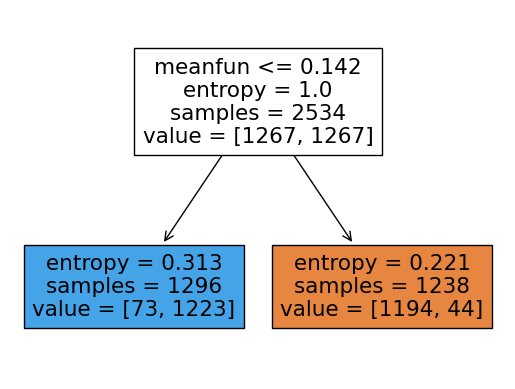

In [4]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy' #критерий информативности
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

#На основе какого фактора будет построено решающее правило в корневой вершине?
#meanfun

#Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх знаков после точки-разделителя.
#0.142

#Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.
round(list(pd.DataFrame(dt.apply(X)).value_counts(normalize=True))[0]*100,1)
#51.1 %

y_predict = dt.predict(X_test)
print(round(metrics.accuracy_score(y_test, y_predict),3))
#0.956

Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений
2. Сколько листьев в построенном дереве содержат в качестве предсказания класс `female`? Для того, чтобы отобразить имена классов при визуализации дерева решения с помощью функции `plot_tree()`, укажите параметр `class_names=dt.classes_`.
3. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

0.962


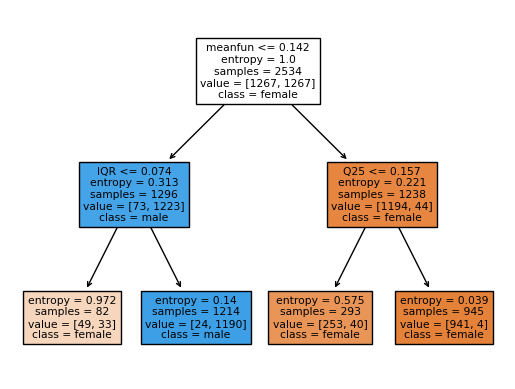

In [5]:
# Инициализируем модель дерева решений с максимальной глубиной 2 и обучаем ее
dt2 = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy' #критерий информативности
)
dt2.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt2, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_  #отображение имён классов
);

#Сколько листьев в построенном дереве содержат в качестве предсказания класс female?
#3

y_predict2 = dt2.predict(X_test)
print(round(metrics.accuracy_score(y_test, y_predict2),3))
#0.962

<AxesSubplot: >

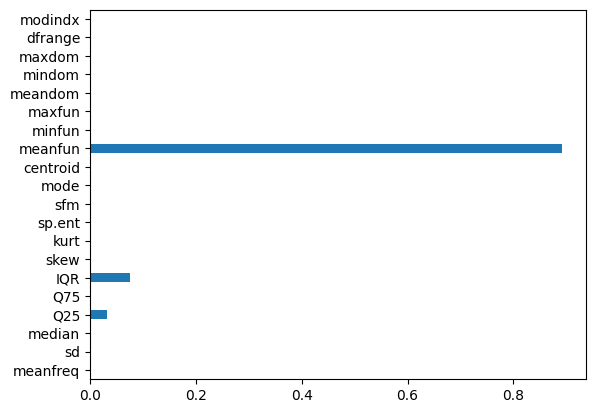

In [6]:
#Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений
feat_importances = pd.Series(dt2.feature_importances_, index=X_test.columns)
feat_importances.plot(kind='barh')
#meanfun (средняя основная частота в акустическом спектре)
#IQR (межквартильный размах частот)
#Q25 (первый квартиль частоты)

Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра `random_state` возьмите 0.

Обучите модель на тренировочной выборке.

1. Чему равна глубина полученного дерева решения? *Напомним, что глубину дерева можно узнать с помощью метода get_depth().*
2. Чему равно количество листьев в полученном дереве решений? *Напомним, что количество листьев можно узнать с помощью метода get_n_leaves().*
3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [7]:
dt_inf = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0
)
dt_inf.fit(X_train, y_train)

#Чему равна глубина полученного дерева решения?
dt_inf.get_depth()
#12

#Чему равно количество листьев в полученном дереве решений?
dt_inf.get_n_leaves()
#54

y_predict_train_inf = dt_inf.predict(X_train)
y_predict_test_inf = dt_inf.predict(X_test)
print(f'Accuracy train - {round(metrics.accuracy_score(y_train, y_predict_train_inf),3)}')
print(f'Accuracy test - {round(metrics.accuracy_score(y_test, y_predict_test_inf),3)}')
#Accuracy train - 1.0
#Accuracy test - 0.973

Accuracy train - 1.0
Accuracy test - 0.973


Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

Задана следующая сетка параметров:
```
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
```

В качестве кросс-валидатора будем использовать k-fold-валидатор со стратификацией (StratifiedKFold):
```
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)
```

С помощью `Grid SearchCV` из модуля `model_selection` библиотеки sklearn переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр `random_state` для дерева решений установите равным 0. В качестве метрики качества (параметр scoring) используйте accuracy.

1. Какой критерий информативности использует наилучшая модель?
2. Чему равна оптимальная максимальная глубина?
3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?
4. С помощью наилучшей модели сделайте предсказание для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
cv = model_selection.StratifiedKFold(n_splits=5)


grid_search = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    cv=cv,
    n_jobs = -1
)

%time grid_search.fit(X_train, y_train) 

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
#Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}

#Какой критерий информативности использует наилучшая модель? 
#gini
#Чему равна оптимальная максимальная глубина?
#7
#Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?
#3

CPU times: total: 1.19 s
Wall time: 20.4 s
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}


In [9]:
#С помощью наилучшей модели сделайте предсказание для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.
dt_best = tree.DecisionTreeClassifier(random_state=0, 
                                      criterion='gini',
                                      max_depth=7,
                                      min_samples_split=3
                                      )
dt_best.fit(X_train, y_train)
y_predict_train_best = dt_best.predict(X_train)
y_predict_test_best = dt_best.predict(X_test)
print(f'Accuracy train - {round(metrics.accuracy_score(y_train, y_predict_train_best),3)}')
print(f'Accuracy test - {round(metrics.accuracy_score(y_test, y_predict_test_best),3)}')

#Accuracy train - 0.996
#Accuracy test - 0.97

Accuracy train - 0.996
Accuracy test - 0.97


Для оптимального дерева решений, построенного в задании выше, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.
Выделите топ-3 наиболее важных факторов, участвующих в построении дерева решений

<AxesSubplot: >

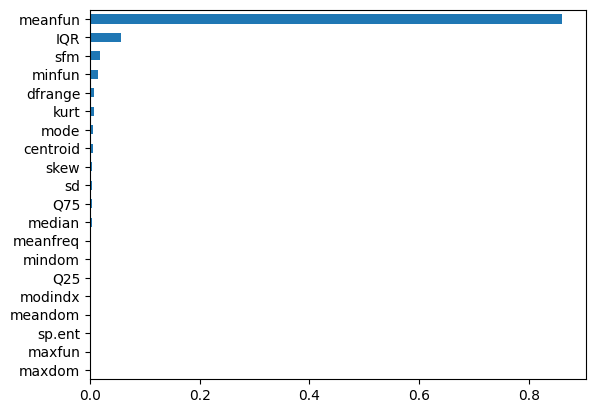

In [13]:
feat_importances = pd.Series(dt_best.feature_importances_, index=X_test.columns)
feat_importances = feat_importances.sort_values()
feat_importances.plot(kind='barh')

#Выделите топ-3 наиболее важных факторов, участвующих в построении дерева решений
#meanfun (средняя основная частота в акустическом спектре)
#IQR (межквартильный размах частот)
#sfm (спектральная равномерность)